# JSS Performance Evaluation

We collect data from N runs processing 100 deployment changes moving the accounting node between Germany and the USA.

Initially, we read the (test) data frame containing values for
 * total time between incoming event (this should be also measuring time) and reconfiguration of probes
 * model update includes code to model level mapping and actual PCM model update
 * privacy update is the complete time necessary to recomupte the privacy properties
 * configuration time is the time used to take the privacy result, compute probe configuration and probe reconfiguration.

In [24]:
data = read.csv("../../iobserve-analysis/evaluate-jss-performance/jss-result.csv")

data

date,configuration.time,model.update,reaction.time,privacy.update,total.processing
0,8305666,1799813,13963535,13200025,13934522
166667207690,1919639,250090,3143789,2953796,3137104
264660969415,1532478,323792,2611405,2385057,2602089
184469796349,1570376,270899,2545727,2331983,2538234
77360826687,2283188,226827,3513635,3371900,3490048
26856761911,3745337,353350,5653685,5624904,5644199
225835185541,1666723,378632,2967911,2628706,2958904
23886981761,8505249,457047,10631133,10294582,10516239
92284719715,2071736,404650,3842604,3509952,3832500
214007531124,1744115,336090,3031946,2725655,3023792


## Load plot libraries and define common R functions

In [25]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)

plotFunc <- function(input, column, label, upperLimit, shape) {
    col <- input[,column]
    return (ggplot(input, aes (y=col, x="")) + geom_boxplot(outlier.shape = shape) + ylab("Time [ns]") + xlab(label) + ylim(0,upperLimit))
}

plotAll <- function(data, upperlimit, shape){
    plots <- list()

    i <- 1
    for (label in colnames(data)) {
        if ( i > 1 ) {
            label <- gsub("[.]", " ",label)
            plots[[i-1]] <- plotFunc(data,i,label,upperLimit, shape)
        }
        i <- i + 1
    }

    ggarrange(plotlist=plots, ncol = length(plots), nrow = 1)
}

options(repr.plot.height=3)

## Measurements

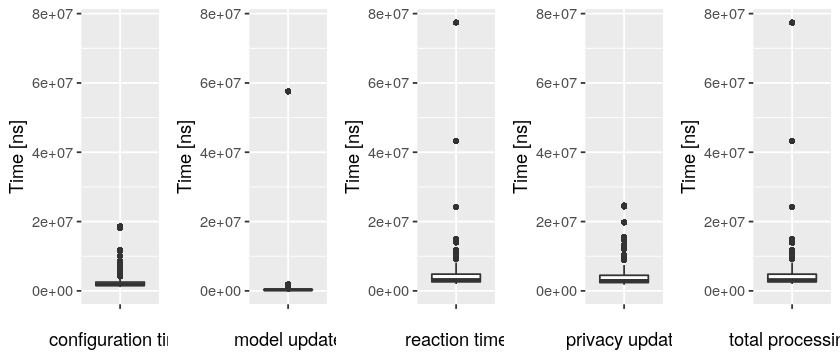

In [26]:
upperLimit <- max(data[,"total.processing"],data[,"reaction.time"])

plotAll(data,upperLimit, 16)

Measurements over Time

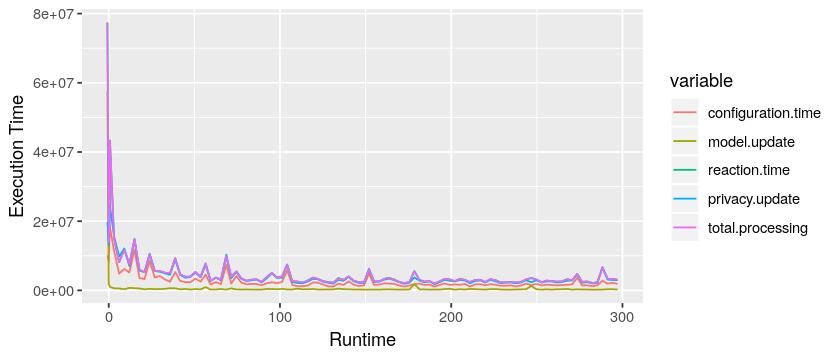

In [74]:
library(reshape2)

plotData <- data
plotData[,"date"] <- plotData[,"date"]/1000/1000/1000

allColumns <- colnames(data)
measureColumns <- allColumns[2:length(allColumns)]

ggData <- melt(plotData, id.vars = "date", measure.vars = measureColumns)

ggplot(ggData, aes(x=date, y=value, color = variable)) + geom_line() + xlab("Runtime") + ylab("Execution Time")

## Measurements without depicting outliers

Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 42 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 37 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 40 rows containing non-finite values (stat_boxplot).”

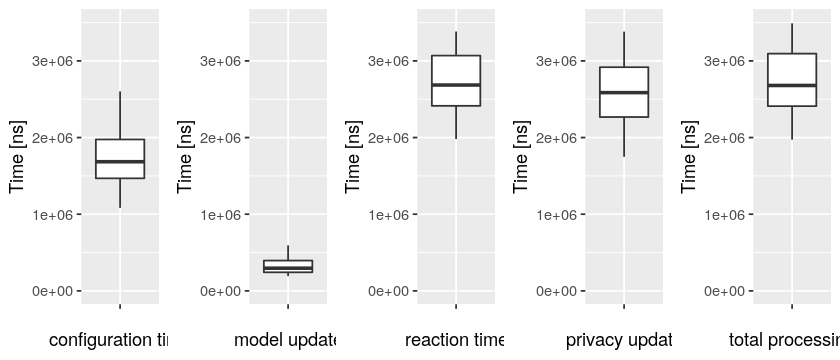

In [18]:
upperLimit <- 3500000

plotAll(data, upperLimit, NA)

In [17]:
label.vals <- c()
mean.vals <- c()
median.vals <- c()
var.vals <- c()

unit.conversion <- 1000 * 1000

i <- 1
for (label in colnames(data)) {
    label.vals[[i]] <- gsub("[.]", " ",label)
    input <- data[,i] / unit.conversion
    median.vals[[i]] <- median(input)
    mean.vals[[i]] <- mean(input)
    var.vals[[i]] <- var(input)
    i <- i + 1
}

result <- data.frame("measurement" = label.vals, "mean" = mean.vals, "median" = median.vals, "variance" = var.vals)

result

measurement,mean,median,variance
configuration time,2.8998327,1.840432,9.042909
model update,0.9287382,0.297486,31.518319
reaction time,5.3894416,3.178749,76.196357
privacy update,4.4618113,2.919334,17.559918
total processing,5.3756289,3.170730,76.132088


All values are in milli seconds.
* _Total processing_ time is the sum of _privacy update_ time and _model update_ time
* _Reaction time_ includes _configuration time_ and _total processing_ time. Still it is lower than _configuration time_ plus _total processing_ time, as the filters for _privacy update_, _model update_ and _configuration_ run in separate threads.